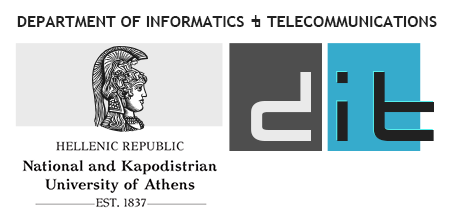
# **Data Mining Techniques - Project 2 - Spring Semester 2023**
**Papasotiri Christina - 1115201900151**

# Preprocessing

In [246]:
import sys
import pandas as pd
import numpy as np

## Insert data from books_1.Best_Books_Ever.csv file

In [247]:
df = pd.read_csv('/content/drive/MyDrive/DIT/8ο εξάμηνο/ΤΕΧΝΙΚΕΣ ΕΞΟΡΥΞΗΣ ΔΕΔΟΜΕΝΩΝ/TEDE/Projects/project2/books_1.Best_Books_Ever.csv')
df

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English

## Check & Handle NaN Data

Υπάρχουν διάφορες στήλες που περιέχούν NaN values όμως θεωρώ ότι μόνο η στήλη description χρειάζεται κατάλληλο χειρισμό:

In [248]:
# check for NaN values
if (df['description'].isnull().values.any() == True):
  # drop them & reset indexing
  df = df.dropna(subset=['description']).reset_index(drop=True)
print(df['description'].isnull().values.any())
df

False


,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51135,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
51136,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
51137,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
51138,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English

## Split ratingsByStars column values to 5 new columns

In [249]:
def convert_str_to_int(columnName):
  """ convert dataframe column from string to integer """
  df[columnName] = pd.to_numeric(df[columnName], errors='coerce')     # convert string to float
  df[columnName] = df[columnName].replace(np.nan, 0, regex=True)      # check to replace NaN values by 0 
  df[columnName] = df[columnName].astype(int)                         # convert float to int 

In [250]:
# split ratingsByStars column into 5 new columns
df[['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']] = df['ratingsByStars'].str.split(",", expand = True)

# convert object to string
df = df.astype({'ratingStar5':'string', 'ratingStar4':'string', 'ratingStar3':'string', 'ratingStar2':'string', 'ratingStar1':'string'})

# remove unwanted characters ( ', [, ] )
df[['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']] = df[['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']].replace({"'" : ""}, regex=True)
df['ratingStar5'] = df['ratingStar5'].str.replace('[', '', regex=True)
df['ratingStar1'] = df['ratingStar1'].str.replace(']', '', regex=True)

# convert strings to ints
convert_str_to_int('ratingStar5')
convert_str_to_int('ratingStar4')
convert_str_to_int('ratingStar3')
convert_str_to_int('ratingStar2')
convert_str_to_int('ratingStar1')

# drop unnecessary column 
df.drop(columns = ['ratingsByStars'])

df.loc[:, ['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']]

,ratingStar5,ratingStar4,ratingStar3,ratingStar2,ratingStar1
0,3444695,1921313,745221,171994,93557
1,1593642,637516,222366,39573,14526
2,2363896,1333153,573280,149952,80794
3,1617567,816659,373311,113934,76770
4,1751460,1113682,1008686,542017,548674
...,...,...,...,...,...
51135,311,310,197,42,11
51136,16,14,5,2,0
51137,2109,1868,1660,647,390
51138,77,78,59,19,5


## Split book genres and keep the first genre only 

In [251]:
# split book genres and keep the 1st genre as string
df['genreSingle'] = df['genres'].str.split(",", n=0, expand=True)[0]
df['genreSingle'] = df['genreSingle'].str.replace('[', '', regex=True)
df['genreSingle'] = df['genreSingle'].str.replace("'", '', regex=True)
df['genreSingle'] = df['genreSingle'].astype('string')

# check for books without any genre information
if (df['genreSingle'].isnull().values.any() == True):
  # drop them & reset indexing
  df = df.dropna(subset=['genreSingle']).reset_index(drop=True)
df['genreSingle'] 

0        Young Adult
1            Fantasy
2           Classics
3           Classics
4        Young Adult
            ...     
51135       Vampires
51136        Mystery
51137        Fantasy
51138        Fiction
51139    Lds Fiction
Name: genreSingle, Length: 51140, dtype: string

## Extract publishYear from publishDate

In [252]:
df['publishYear'] = df['publishDate'].astype('string')
# check for NaN dates
if (df['publishYear'].isnull().values.any() == True):
  # drop them & reset indexing
  df = df.dropna(subset=['publishYear']).reset_index(drop=True)

# delete rows based on unexpacted values
df = df.query("publishYear != 'Published'")
df = df[df['publishYear'].str.contains("publi|book|Books|books|vote|Great") == False]
df = df.reset_index(drop=True)

# convert strings to datetime
df['publishYear'] = pd.to_datetime(df['publishYear'], errors='coerce')
# extract year from datetime
df['publishYear'] = df['publishYear'].dt.to_period('Y')

df.loc[:, ['publishYear', 'publishDate']]

,publishYear,publishDate
0,2008,09/14/08
1,2004,09/28/04
2,2006,05/23/06
3,2000,10/10/00
4,2006,09/06/06
...,...,...
49694,2011,May 28th 2011
49695,2011,August 5th 2011
49696,2011,March 18th 2011
49697,2011,September 1st 2011
